In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dr = r'/content/drive/My Drive/colab notebooks/Project - Short Answer Scoring/train.tsv'

In [0]:
train = pd.read_csv(train_dr , delimiter = '\t',encoding='utf-8' )

In [6]:
train.sample(5)

,Id,EssaySet,Score1,Score2,EssayText
1836,2952,2,2,2,Plastic type B stretas the furthet out of the ...
1264,1265,1,2,2,"In order to replicate this experiment, you wou..."
3194,5162,3,0,0,Pandas in China are similar to koalas in Austr...
8372,12760,5,0,0,"mRNA goes to the cytoplasm.There, it makes cop..."
6259,9488,4,1,0,I think the word invasive means species from o...


Analyzing the data

In [7]:
train.groupby("EssaySet").count()

,Id,Score1,Score2,EssayText
EssaySet,,,,
1,1672,1672,1672,1672
2,1278,1278,1278,1278
3,1891,1891,1891,1891
4,1738,1738,1738,1738
5,1795,1795,1795,1795
6,1797,1797,1797,1797
7,1799,1799,1799,1799
8,1799,1799,1799,1799
9,1798,1798,1798,1798


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


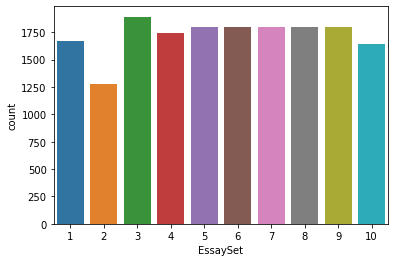

In [8]:
import seaborn as sns
sns.countplot(x = "EssaySet", data = train)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17207 entries, 0 to 17206
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         17207 non-null  int64 
 1   EssaySet   17207 non-null  int64 
 2   Score1     17207 non-null  int64 
 3   Score2     17207 non-null  int64 
 4   EssayText  17207 non-null  object
dtypes: int64(4), object(1)
memory usage: 672.3+ KB


In [0]:
temp = train[train["Score1"] == train["Score2"]]

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15001 entries, 0 to 17204
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         15001 non-null  int64 
 1   EssaySet   15001 non-null  int64 
 2   Score1     15001 non-null  int64 
 3   Score2     15001 non-null  int64 
 4   EssayText  15001 non-null  object
dtypes: int64(4), object(1)
memory usage: 703.2+ KB


In [0]:
predictor = train.Score1
train = train.drop(["Id", "Score2", "Score1"], axis = 1)

In [0]:
predictor = predictor.to_numpy()

In [0]:
from nltk import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def freq_dist(data, topk = 30):
    tokenized_data = [sent.split() for sent in data]
    flatten_data = [words for sent in tokenized_data for words in sent]
    freq_dist_data = FreqDist(flatten_data)
    freq_dist_data.plot(topk, cumulative=False)
    return

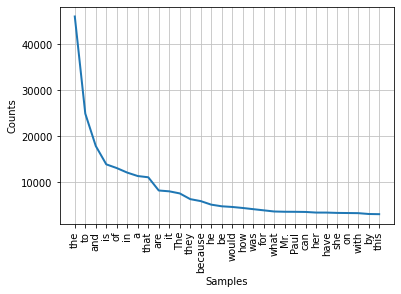

In [16]:
freq_dist(train.EssayText)

Text Preprocessing

In [0]:
import re
from nltk.stem import PorterStemmer

In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [19]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def preprocessed(text): # Function for text preprocessing
    text = text.lower() # to lowercase the text
    text = re.sub(r"\W"," ", text) # to remove all non-alphanumeric characters
    text = re.sub(r"\s+"," ", text) # to remove extra spaces
    text = re.sub(r"[ ][A-Za-z]{1}\b"," ", text) # to remove words with single chsaracter
    #text = re.sub(r"[^A-Za-z]+\b"," ", text) # to remove all the numbers
    text = " ".join([word for word in text.split() if not word in stop_words]) # to remove all the stopwords
    text = text.strip() # striping all the extra spaces at all start and end of the text
    text = " ".join([PorterStemmer().stem(word=word) for word in text.split()]) # stemming of texts
#text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return text

We havent removed numbers in text preprocessing because EssaySet 1,2 & 10 belong to science. we will remove digits ecxept these three sets

In [0]:
def preprocessed_1(text): # Function for text preprocessing
    text = re.sub(r"[0-9]+\b"," ", text) # to remove all the numbers
    text = re.sub(r"\s+"," ", text) # to remove extra spaces
    text = text.strip() # striping all the extra spaces at all start and end of the text
    return text

In [0]:
train["EssayText"] = train["EssayText"].map(preprocessed)

In [0]:
for text, e_set in zip(train["EssayText"], train["EssaySet"]):
  if e_set not in (1, 2, 10):
    text = preprocessed_1(text)


In [24]:
train["EssayText"][train["EssaySet"] == 1][0]

'addit inform would need replic experi much vinegar place ident contain tool use measur mass four differ sampl much distil water use rins four sampl take vinegar'

Analyzing text after preprocessing

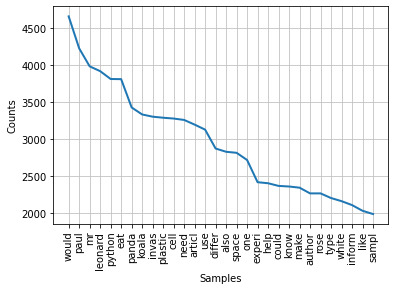

In [25]:
freq_dist(train.EssayText)

In [0]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(train[['EssaySet']]).toarray())
# merge with main df bridge_df on key values
train = train.join(enc_df)

In [27]:
train_1 = train.drop(["EssaySet"], axis = 1)
train_1.sample(5)

,EssayText,0,1,2,3,4,5,6,7,8,9
2142,student conclud plastic stretch farthest plast...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,wish replic experi would show tell much vinega...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3056,panda koala eat thing everyday day panda eat b...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16485,white white would reflect heat dog would get v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14879,author start surpris statement alarm reader ma...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train, predictor, test_size = 0.25, random_state = 0)

In [29]:
X_train.groupby("EssaySet").count()

,EssayText,0,1,2,3,4,5,6,7,8,9
EssaySet,,,,,,,,,,,
1,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
2,970,970,970,970,970,970,970,970,970,970,970
3,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445
4,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304
5,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302
6,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
7,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
8,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
9,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342


**Approach 1 - TFIDF Vectorizer**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect1 = CountVectorizer(min_df = 25, max_df = 0.75, ngram_range = (1,2)).fit(train.EssayText) # crearing TFIDF Object

In [31]:
vocab1 = vect1.get_feature_names() # Getting Vocabulary 
print(len(vocab1))

2695


In [0]:
X_train_vect1 = vect1.transform(X_train.EssayText) # Transforming train data into TFIDF vectors
X_test_vect1 = vect1.transform(X_test.EssayText)

In [33]:
print(X_train_vect1.shape, X_test_vect1.shape)

(12905, 2695) (4302, 2695)


In [34]:
type(X_test_vect1)

scipy.sparse.csr.csr_matrix

In [0]:
X_train_vect1 = X_train_vect1.toarray() # converting train data from sparse matrix to numpy array
X_test_vect1 = X_test_vect1.toarray()

converting one hot transformed Essay set to numpy array and joining them with tfidf vectors

In [0]:
enc_df_train = X_train.drop(["EssayText", "EssaySet"], axis = 1).to_numpy()  
enc_df_test = X_test.drop(["EssayText", "EssaySet"], axis = 1).to_numpy()

In [0]:
X_train_vector = np.concatenate((X_train_vect1, enc_df_train), axis=1)
X_test_vector = np.concatenate((X_test_vect1, enc_df_test), axis=1)

Standardization of input features

In [0]:
from sklearn import preprocessing
X_train_vector = preprocessing.scale(X_train_vector)
X_test_vector = preprocessing.scale(X_test_vector)

In [39]:
X_train_vector.shape

(12905, 2705)

Training the model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier()
Y_value = RF.fit(X_train_vector, Y_train).predict(X_test_vector)
RF_accuracy = accuracy_score(Y_test, Y_value, normalize = True)
RF_accuracy

0.6957229195722919

In [41]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(max_iter=100, verbose=1)
SVM.fit(X_train_vector, Y_train)
Y_value = RF.predict(X_test_vector)
SVM_accuracy = accuracy_score(Y_test, Y_value, normalize = True)
SVM_accuracy

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6957229195722919

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Y_value = lr.fit(X_train_vector, Y_train).predict(X_test_vector)
accuracy = accuracy_score(Y_test, Y_value, normalize = True)
accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.604137610413761

**Approach 2 - Using Doc2Vec sentence embedding**

In [0]:
from gensim.models import Word2Vec
import gensim

In [0]:
tokenized_corpus = [sent.split() for sent in train.EssayText]

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

Taggings of documents is also required for Doc2Vec embedding

In [0]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_corpus)]

In [0]:
model = Doc2Vec(tagged_data, vector_size = 100, window=2, min_count=1, workers=4, epochs = 100)

In [82]:
model.infer_vector(["Everything", "is", "beautiful"])

array([-0.341588  , -0.21284384, -0.26406586,  0.01139877,  0.54825544,
        0.06298258, -0.07898441,  0.18995008,  0.06611384,  0.21803704,
        0.18557933,  0.46188867, -0.227896  ,  0.53614175,  0.05628461,
        0.47937483,  0.4659634 ,  0.2915573 , -0.16888443,  0.18574485,
        0.64371675, -0.32813376,  0.27230367, -0.68432844, -0.08632185,
        0.31497678, -0.33095908,  0.3569189 , -0.00708635, -0.17343429,
        0.42175248, -0.41791078,  0.3696696 , -0.15342353, -0.06913704,
        0.07735689,  0.20738594,  0.47732058,  0.35390016,  0.1299922 ,
       -0.6343037 ,  0.00671168,  0.3090169 ,  0.26467457,  0.27500764,
       -0.3073121 ,  0.86938614,  0.3966776 ,  0.24350111,  0.11297609,
        0.51624984,  0.09853066,  0.57156134, -0.14354578, -0.45896712,
       -0.3347387 , -0.4232159 , -0.5898068 ,  0.14335886,  0.48741508,
        0.45619312, -0.08641104, -0.09116917,  0.2030905 , -0.20060948,
       -0.03714772, -0.12579137, -0.0238202 , -0.16378091,  0.17

In [0]:
train_tokenize  =[doc.split() for doc in X_train.EssayText]
test_tokenize  = [doc.split() for doc in X_test.EssayText]

In [0]:
def doc_to_vector(data): # Funtion to converts documents into vectors
    vectors = []
    for doc in data:
        tokens = doc.split()
        vectors.append(model.infer_vector(tokens))
    return vectors

In [0]:
train_vector = doc_to_vector(X_train.EssayText) # train doc vextors
test_vector = doc_to_vector(X_test.EssayText) # test doc vectors

In [0]:
# Converting vector list into arrays
train_vector = np.asarray(train_vector)
test_vector = np.asarray(test_vector)

In [87]:
train_vector.shape

(12905, 100)

In [0]:
X_train_vector = np.concatenate((train_vector, enc_df_train), axis=1)
X_test_vector = np.concatenate((test_vector, enc_df_test), axis=1)

In [0]:
from sklearn import preprocessing
X_train_vector = preprocessing.scale(X_train_vector)
X_test_vector = preprocessing.scale(X_test_vector)

In [90]:
X_train_vector.shape

(12905, 110)

In [91]:

RF = RandomForestClassifier()
Y_value = RF.fit(X_train_vector, Y_train).predict(X_test_vector)
RF_accuracy = accuracy_score(Y_test, Y_value, normalize = True)
RF_accuracy

0.5771734077173408

In [92]:
SVM = LinearSVC(max_iter=100, verbose=1)
SVM.fit(X_train_vector, Y_train)
Y_value = RF.predict(X_test_vector)
SVM_accuracy = accuracy_score(Y_test, Y_value, normalize = True)
SVM_accuracy

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5771734077173408

In [93]:
lr = LogisticRegression()
Y_value = lr.fit(X_train_vector, Y_train).predict(X_test_vector)
accuracy = accuracy_score(Y_test, Y_value, normalize = True)
accuracy

0.5774058577405857